In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
BAC = data.DataReader("BAC", data_source="yahoo", start = "2000-01-01", end = "2019-06-01")
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,25.12500,24.00000,25.12500,24.21875,13705800.0,12.253836
2000-01-04,23.96875,22.46875,23.87500,22.78125,27293400.0,11.526516
2000-01-05,23.21875,22.25000,22.53125,23.03125,22855600.0,11.653006
2000-01-06,25.00000,23.37500,23.46875,25.00000,17307000.0,12.649126
2000-01-07,24.81250,24.00000,24.81250,24.34375,11632800.0,12.317083


In [3]:
BAC.shape

(4878, 6)

In [4]:
BAC_train = BAC.iloc[:4000, :]
BAC_train.shape

(4000, 6)

In [5]:
BAC_test = BAC.iloc[4000:, :]
BAC_test.shape

(878, 6)

In [6]:
training_set = BAC.iloc[:4000, 2:3].values
training_set

array([[25.125     ],
       [23.875     ],
       [22.53125   ],
       ...,
       [17.80999947],
       [17.62000084],
       [17.26000023]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3999):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fitting the RNN to the Training set using Keras Callbacks
es = EarlyStopping(monitor='loss', mode='min', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
history = regressor.fit(X_train, y_train, shuffle=True, epochs = 100, callbacks=[es, rlr,mcp, tb],batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Christy\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3939/3939 [==============================] - 195s 49ms/step - loss: 0.0182

Epoch 00001: loss improved from inf to 0.01818, saving model to weights.h5
Epoch 2/100
3939/3939 [==============================] - 197s 50ms/step - loss: 0.0043

Epoch 00002: loss improved from 0.01818 to 0.00425, saving model to weights.h5
Epoch 3/100
3939/3939 [==============================] - 171s 43ms/step - loss: 0.0036

Epoch 00003: loss improved from 0.00425 to 0.00361, saving model to weights.h5
Epoch 4/100
3939/3939 [==============================] - 165s 42ms/step - loss: 0.0033

Epoch 00004: loss improved from 0.00361 to 0.00328, saving model to weights.h5
Epoch 5/100
3939/3939 [==============================] - 169s 43ms/step - loss: 0.0033

Epoch 00005: loss did not improve from 0.00328
Epoch 6/100
3939/3939 [==============================] - 189s 48ms/step - loss: 0.0028

Epoch 00006: loss improved from 0.00328 to 0.00281, saving model 

3939/3939 [==============================] - 100s 25ms/step - loss: 9.5477e-04

Epoch 00051: loss did not improve from 0.00090
Epoch 52/100
3939/3939 [==============================] - 99s 25ms/step - loss: 9.4076e-04

Epoch 00052: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00052: loss did not improve from 0.00090
Epoch 53/100
3939/3939 [==============================] - 97s 25ms/step - loss: 9.6032e-04

Epoch 00053: loss did not improve from 0.00090
Epoch 54/100
3939/3939 [==============================] - 97s 25ms/step - loss: 8.9419e-04

Epoch 00054: loss improved from 0.00090 to 0.00089, saving model to weights.h5
Epoch 55/100
3939/3939 [==============================] - 99s 25ms/step - loss: 9.1654e-04

Epoch 00055: loss did not improve from 0.00089
Epoch 56/100
3939/3939 [==============================] - 100s 25ms/step - loss: 8.8482e-04

Epoch 00056: loss improved from 0.00089 to 0.00088, saving model to weights.h5
Epoch 57/100
3939/3939 [=========

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real recent stock price until May 2019
real_stock_price = BAC_test.iloc[:, 2:3].values

In [10]:
# Getting the predicted stock price until May 2019
BAC_total = pd.concat((BAC_train['Close'], BAC_test['Close']), axis = 0)
inputs = BAC_total[len(BAC_total) - len(BAC_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 938):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

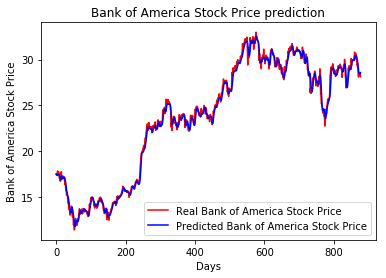

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Bank of America Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Bank of America Stock Price')
plt.title('Bank of America Stock Price prediction')
plt.xlabel('Days')
plt.ylabel('Bank of America Stock Price')
plt.legend()
plt.show()

In [15]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

0.46212104733373877

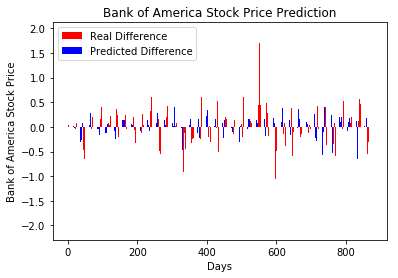

In [16]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('Bank of America Stock Price Prediction')
ax.set_xlabel('Days')
ax.set_ylabel('Bank of America Stock Price')
ax.legend()
plt.show()